Make a jupyter notebook that uses mdtraj to 
	a) read in the md trajectory of beta amyloid
	b) compute the end-end distance at each time, and the radius of gyration at each time
    c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
	d) plot a normalized histogram of end-end distance and another of radius of gyration
	

In [18]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [19]:
cd /scratch/work/courses/CHEM-GA-2671-2023fa/students/sea438/comp-lab-class-2023/Week2/Data

/scratch/work/courses/CHEM-GA-2671-2023fa/students/sea438/comp-lab-class-2023/Week2/Data


In [20]:
# load the trajectory
# top file is Data/1hz3_T310.start.nowater.gro
# trajectory file is Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc

traj = md.load_xtc('1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='1hz3_T310.start.nowater.gro')

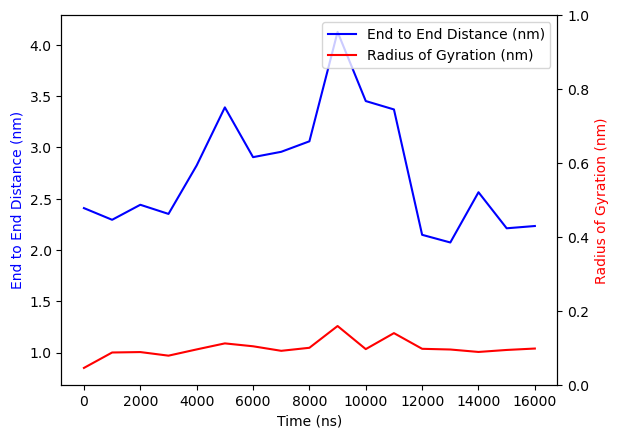

In [22]:
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

# compute the radius of gyration
rg = md.compute_rg(traj)

#plot distance vs time
fig, ax1=plt.subplots()
ax1.plot(traj.time, dist, label='End to End Distance (nm)', color='blue')
ax1.plot(traj.time,rg,label='Radius of Gyration (nm)',color='red')

ax2=ax1.twinx()
ax1.set_ylabel('End to End Distance (nm)',color='blue')
ax2.set_ylabel('Radius of Gyration (nm)',color='red')
ax1.legend(loc='upper right')

ax1.set_xlabel('Time (ns)')

plt.show()

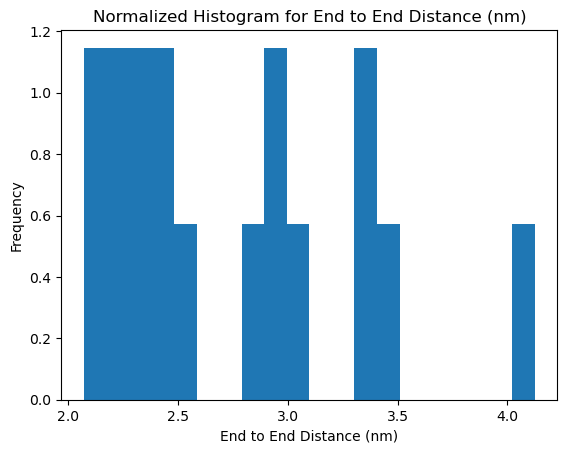

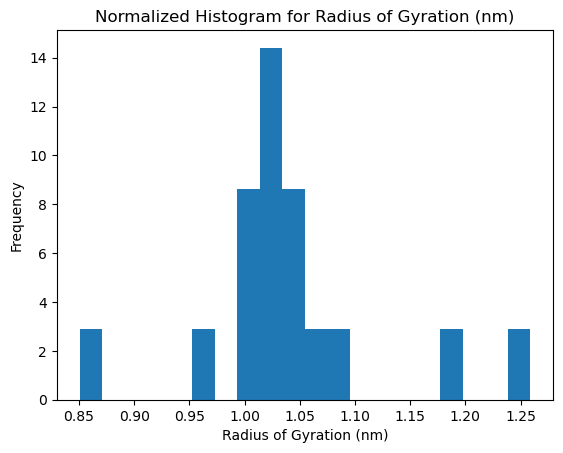

In [26]:
# print the mean and standard deviation for end to end distance
mean_dist = dist.mean()
std_dist = dist.std()

# print the mean and standard deviation for the radius of gyration
avg_rg = rg.mean()
std_rg = rg.std()

# plotting histograms for both distance and radius of gyration
data = {'End to End Distance (nm)': dist,'Radius of Gyration (nm)': rg}

for i in data:
    plt.hist(data[i],bins=20,density=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Normalized Histogram for ' + i)
    plt.show()